<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
# Q1.1

sat_scores = 'C:/Users/norik/Desktop/DSI7 GA Coursework/Projects/Project-2-Submission/sat_scores.csv'

# Open sat_scores.csv file
with open(sat_scores, mode='r') as f:
    sat_score_data = f.readlines()


# print(sat_score_data) ['State,Rate,Verbal,Math\n', 'CT,82,509,510\n', 'NJ,81,499,513\n', ... ]
# type(sat_score_data) is a list

In [3]:
# Q1.1 cont

# create an empty list
sat_score_list = []


for i in sat_score_data:        # for each element in [sat_score_data] list
    #print(i)
    i = i.replace('\n', '')     # replace '\n' with nothing
    #print(i)  
    row = i.split(',')          # split each row @ ',' make list of [each row]
    #print(row)
    sat_score_list.append(row)  # append [each row] to [sat_score_list]

# print(sat_score_list)         # [['State', 'Rate', 'Verbal', 'Math'], ['CT', '82', '509', '510'], ...]



# Create arrays
sat_score_array = np.array(sat_score_list)
# sat_score_array.shape = (53, 4)
# print(sat_score_array)  # [['State' 'Rate' 'Verbal' 'Math']
                          #  ['CT' '82' '509' '510']
                          #  ['NJ' '81' '499' '513']
                          #                     ...]]

# Determine row and column sizes         
row_size    = np.size(sat_score_array,axis=0)  # 53
column_size = np.size(sat_score_array,axis=1)  # 4

In [4]:
sat_score_dict = {}



for i in range(0, column_size):
    #print(i)  gives 0, 1, 2, 3
    value = []
    for j in range(0, row_size):
        #print(j) gives 0-52 x 4 times 
        if j == 0:   # first row is 'key'
            key = sat_score_array[j][i]
            print(key) #give State, Rate, Verbal, Math
        else:
            value.append(sat_score_list[j][i])
    # print(value) 
    sat_score_dict[key] = value

State
Rate
Verbal
Math


In [5]:
sat_score_dict_df = pd.DataFrame(sat_score_dict)
sat_score_dict_df.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [6]:
# Q1.2

df = pd.read_csv(sat_scores)  # Loading csv.file to  data frame
df.head()                     # check first 5 rows

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [7]:
# Q1.2 cont

df.dtypes  # check data types of each column

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [8]:
df.shape

(52, 4)

In [9]:
# Q1.2 cont

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [10]:
sat_score_dict_df.info()

# Once put in a dictionary, the data type of scores are 'objects' rather than 'intergers'.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null object
Verbal    52 non-null object
Math      52 non-null object
dtypes: object(4)
memory usage: 1.7+ KB


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [11]:
# Q1.3

df.head(10)    # load first 10 rows of data

               # Data describes the SAT scores of Verbal and Math and the rate of students who participate in SAT??

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [12]:
df = pd.read_csv(sat_scores)  # Loading csv.file to  data frame
df.head()                     # check first 5 rows

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [13]:
# Q2

df.columns

Index(['State', 'Rate', 'Verbal', 'Math'], dtype='object')

In [14]:
df.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [15]:
df.dtypes['Verbal']

dtype('int64')

In [17]:
#Q2 cont

df.shape

(52, 4)

In [18]:
# Create a data dictionary
# name, type, description, shape

data_description = ['State Name', 'Participation Rate', 'Verbale test score', 'Math test score']

data_dictionary = {}


#df_columns_list = list(df.columns)
#df_columns_list[1]
# len(df_columns_list) gives 4


for i in range(len(df.columns)):
    # print(i) #gives 0,1,2,3
    key = df.columns[i]
    #print(key) # gives 'State', 'Rate', 'Verbal', 'Math'
    
    # create a list which includes data_description and data_type
    value = [data_description[i], df[key].dtypes]
    data_dictionary[key] = value
    
data_dictionary['shape'] = df.shape    
    
print(data_dictionary)



{'State': ['State Name', dtype('O')], 'Rate': ['Participation Rate', dtype('int64')], 'Verbal': ['Verbale test score', dtype('int64')], 'Math': ['Math test score', dtype('int64')], 'shape': (52, 4)}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [19]:
import seaborn as sns

In [20]:
# Q3.1

# Check 'Rate' data
df['Rate'].describe()

count    52.000000
mean     37.153846
std      27.301788
min       4.000000
25%       9.000000
50%      33.500000
75%      63.500000
max      82.000000
Name: Rate, dtype: float64

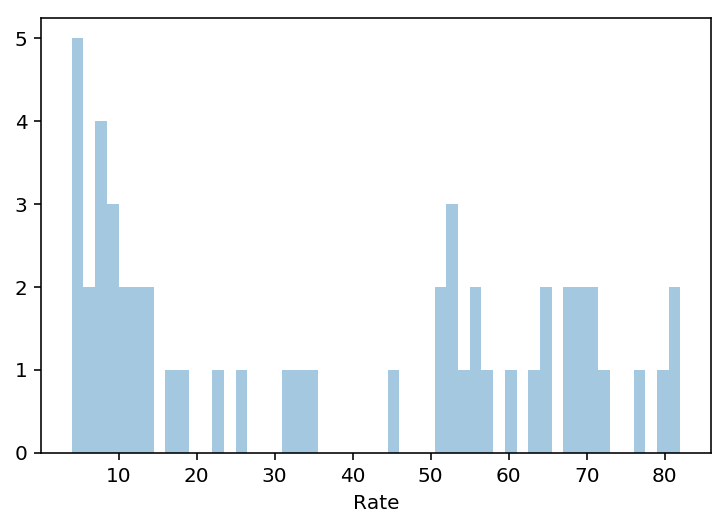

In [21]:
# plot distribution plot for 'Rate'
sns.distplot(df['Rate'], kde=False, bins=len(df['Rate']))

In [22]:
#Q3.1 cont

# Check 'Math' data
df['Math'].describe()

count     52.000000
mean     531.500000
std       36.014975
min      439.000000
25%      504.000000
50%      521.000000
75%      555.750000
max      603.000000
Name: Math, dtype: float64

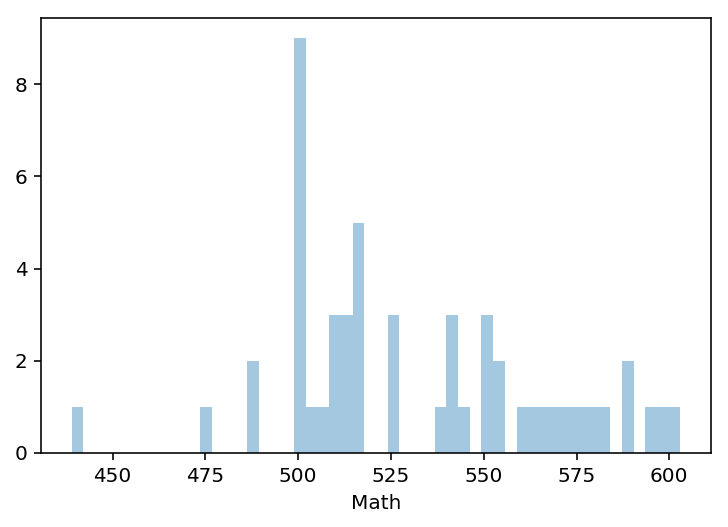

In [23]:
# plot distribution plot for 'Math'
sns.distplot(df['Math'], kde=False, bins=len(df['Rate']))

In [24]:
#Q3.1 cont

# Check 'Verbal' data
df['Verbal'].describe()

count     52.000000
mean     532.019231
std       33.236225
min      482.000000
25%      501.000000
50%      526.500000
75%      562.000000
max      593.000000
Name: Verbal, dtype: float64

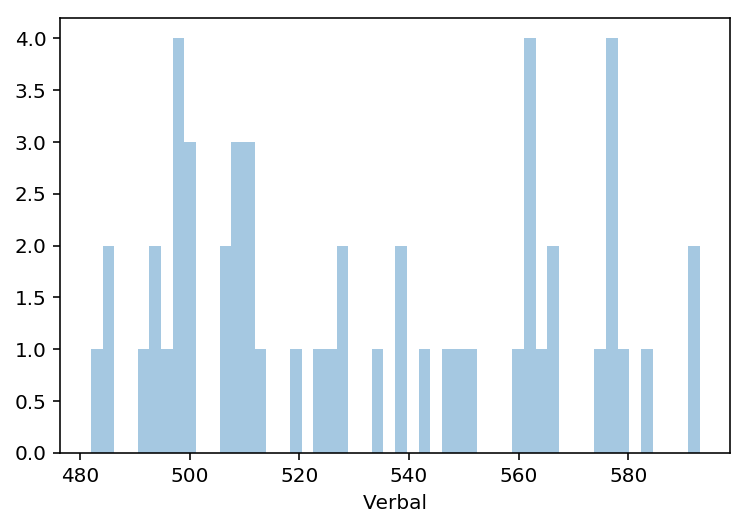

In [25]:
# plot distribution plot for 'Verbal'
sns.distplot(df['Verbal'], kde=False, bins=len(df['Rate']))

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

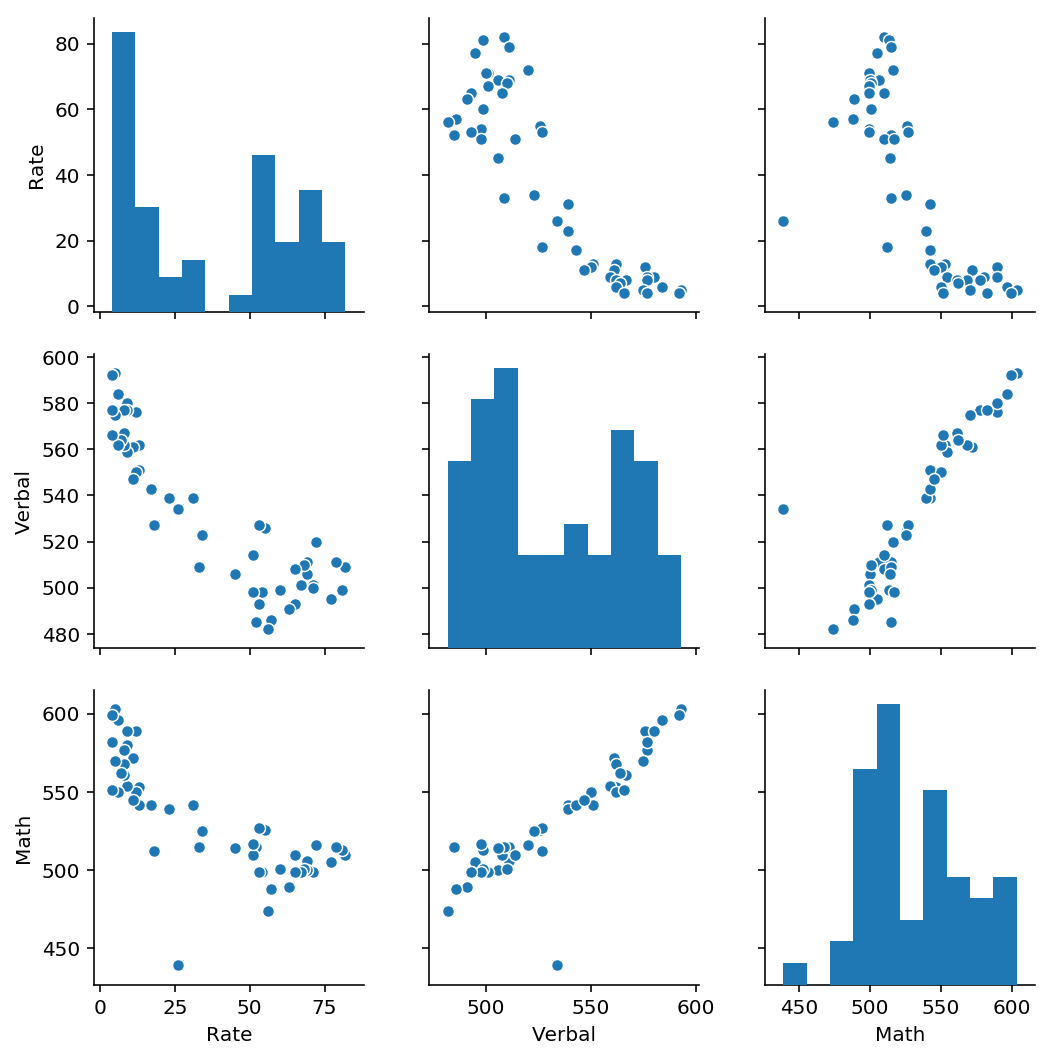

In [26]:
#Q3.2

# Plot joint distibution of each pair of 'Rate', 'Math' and 'Verbal'
sns.pairplot(df)


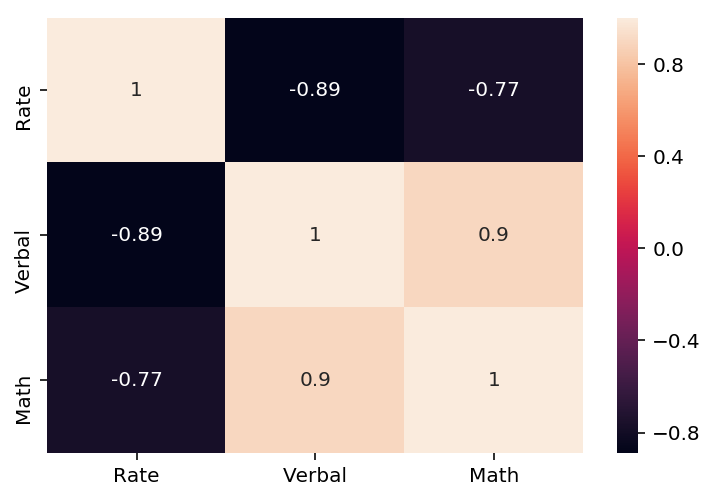

In [27]:
#Q3.2 cont
# From the pair plots above, there is a strong positive linear correlation between..
# .. Math and Verval scores.
# The rate of participation has a strong negative correlation with both math and verbal scores.

sns.heatmap(df.corr(), annot=True)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

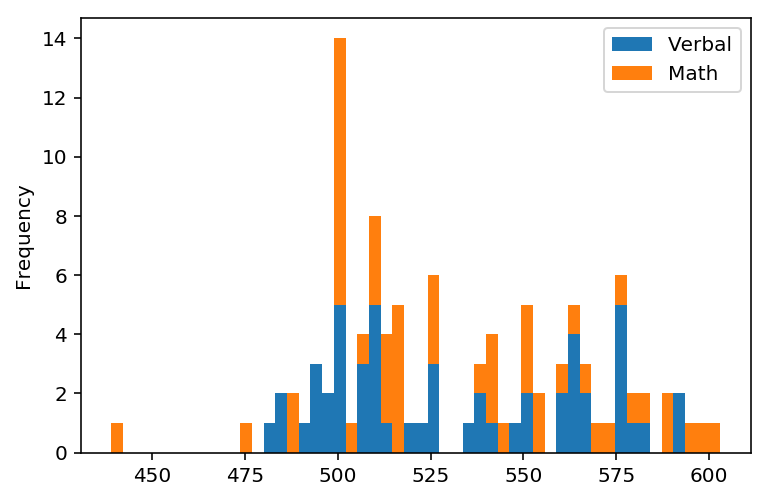

In [28]:
#Q4.1

# plot a stacked histogram with Verbal and Math

df[['Verbal', 'Math']].plot(kind='hist', stacked = True, bins = len(df['Rate']))

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

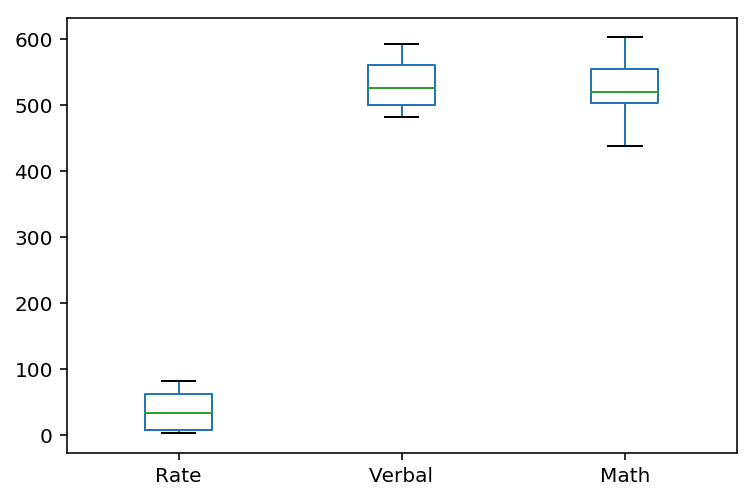

In [29]:
#Q4.2

# plot a box diagram with Verbal and Math on the same chart
df[['Rate', 'Verbal', 'Math']].plot(kind='box')

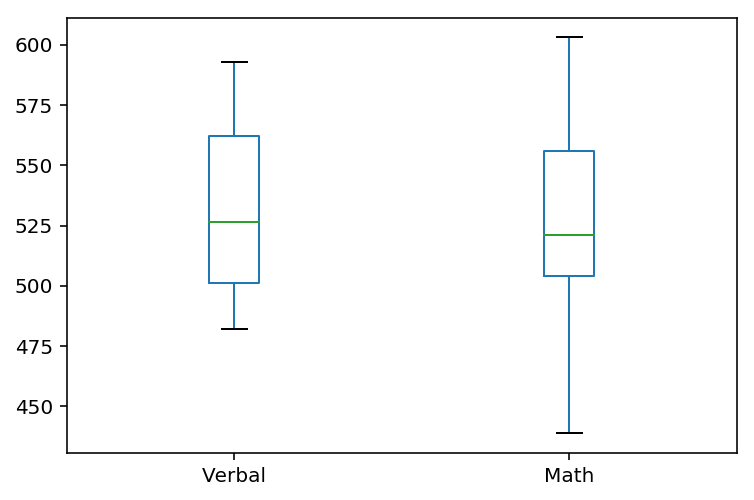

In [30]:
# plot a box diagram with Verbal and Math on the same chart
df[['Verbal', 'Math']].plot(kind='box')

In [31]:
#Q4.2 cont

# Plotting a box-plot of 'Rate' is not practical as the scale for Rate is much smaller than the values of 'Verbal' and 'Math'

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [714]:
# Q4.3

# Boxplot 'Verbal', 'Math' and 'Rate' on the same chart by standardising the values

norm_dict = {}



for item in df.columns:  # iterate through each of 'State', 'Rate', 'Verbal', 'Math'
    #print(df[item].dtypes)
    
    
    
    if df[item].dtypes == 'object':
        norm_dict[item] = df[item].values.tolist()  # convert array of values to a list
        #print(norm_dict)
    
    else:
        norm_list = []
        
        for i in range(len(df[item])):  # iterate through all values under each column
            #print(i) #gives 52 x 3 values
            
            z = (df[item][i] - df[item].mean())/df[item].std()  # calculate standardised value for each cell
            #print(z) #gives 52 x 3 standardised values
            
            norm_list.append(z) 
            #print(norm_list) # gives 3 lists of standardised values for each column
            norm_dict[item] = norm_list
        norm_dict

#print(norm_dict)  # gives {'item' : [norm_list]}

In [33]:
norm_df = pd.DataFrame(norm_dict)  # put dictionary into a data frame
norm_df.head()

,State,Rate,Verbal,Math
0,CT,1.642609,-0.692595,-0.596974
1,NJ,1.605981,-0.993471,-0.513675
2,MA,1.532726,-0.632419,-0.458143
3,NY,1.459470,-1.113822,-0.735805
4,NH,1.276332,-0.361630,-0.430377


In [34]:
norm_df.shape

(52, 4)

In [35]:
norm_df.describe()

,Rate,Verbal,Math
count,5.200000e+01,5.200000e+01,5.200000e+01
mean,2.167070e-16,1.558582e-15,-2.135044e-18
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.214347e+00,-1.504961e+00,-2.568376e+00
25%,-1.031209e+00,-9.332958e-01,-7.635713e-01
50%,-1.338318e-01,-1.660607e-01,-2.915454e-01
75%,9.649974e-01,9.020510e-01,6.733310e-01
max,1.642609e+00,1.834768e+00,1.985285e+00


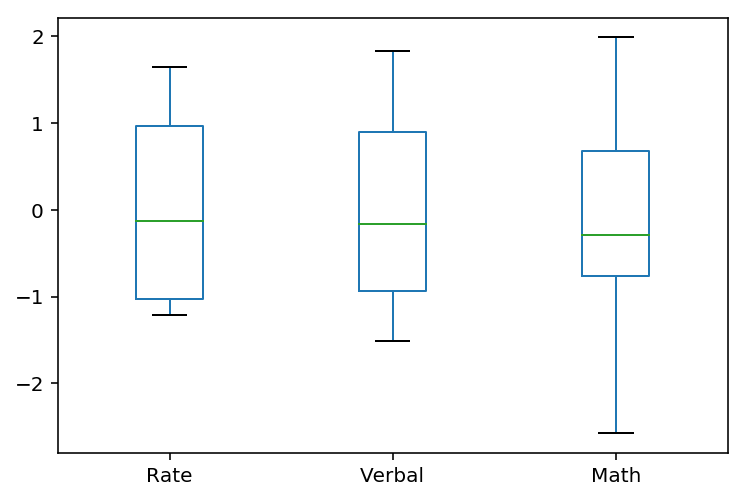

In [36]:
# plot a box diagram with Rate, Verbal and Math on the same chart

norm_df[['Rate', 'Verbal', 'Math']].plot(kind='box')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [37]:
# Q5.1

# Find mean of the 'Verbal'

mean_verbal = df['Verbal'].mean() 
#print(mean_verbal) # gives 532.0192307692307

smart_verbal_mean = df['Verbal'] > mean_verbal
df[smart_verbal_mean].head()

,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553


In [38]:
# Q5.1 cont

# number of states above mean
df[smart_verbal_mean].shape

# there are 24 states with Verbal scores above mean out of 52 states

# From the data on 'Verbal', there are about half of entire states above mean.

(24, 4)

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [39]:
# Q5.2

# Find median of the 'Verbal'

median_verbal = df['Verbal'].median() 
#print(median_verbal) # gives 526.5

smart_verbal_median = df['Verbal'] > median_verbal
df[smart_verbal_median].head()

,State,Rate,Verbal,Math
19,WA,53,527,527
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
29,WV,18,527,512


In [40]:
# Q5.2 cont

# find number of states that have 'Verbal' score greater than median score
df[smart_verbal_median].shape

# There are more states with 'Verbal' score > median than  score > mean.
# This indicates mean > median
# The distribution is slightly skewed to the left. (negatively skewed)

(26, 4)

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [41]:
# Q5.3

# create a column which is 'Verbal' minus 'Math'
df_added = df.assign(score_difference = df['Verbal'] - df['Math'])

df_added.head()

,State,Rate,Verbal,Math,score_difference
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [42]:
# Q5.4.1

# First 10 states with greatest gap between 'Verbal' and 'Math' where 'Verbal' > 'Math' 

df_10_Verbal = df_added.sort_values(by='score_difference', ascending=True).head(10)

df_10_Verbal.head(3)

,State,Rate,Verbal,Math,score_difference
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


In [43]:
# Q5.4.2

# First 10 states with greatest gap between 'Verbal' and 'Math' where  'Math' > 'Verbal'

df_10_Math = df_added.sort_values(by='score_difference', ascending=False).head(10)

df_10_Math.head(3)

,State,Rate,Verbal,Math,score_difference
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [60]:
# Q6.1

# linear correlation between variables 

df.corr()

# 'Verbal' and 'Math a strongly linear-correlated'

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [61]:
df.describe()

# count : number of data points
# mean  : average value/ score
# std   : standard deviation of distrbution of each column
# min   : minimum value of each column
# 25%   : score below which 25% of students scored
# 50%   : score below which 50% of students scored
# 75%   : score below which 75% of students scored
# max   : maximum value of each column

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [62]:
df.cov()

# covariance - measure of how much two random variables vary together
#              related to product of variance of one variable and that of another variable
# correlation - correlation is normalised by dividing covariance by product of std of two variables

# correlation indicates how strongly two variables are related to each other.
# covariance indicates how tow variables change together. 

,Rate,Verbal,Math
Rate,745.387632,-804.355958,-760.803922
Verbal,-804.355958,1104.646682,1077.147059
Math,-760.803922,1077.147059,1297.078431


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [678]:
# Read csv file

drug = pd.read_csv('C:/Users/norik/Desktop/DSI7 GA Coursework/Projects/Project-2-Submission/drug-use-by-age.csv')

In [679]:
drug.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [682]:
drug.shape

(17, 28)

In [683]:
drug.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

In [681]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [116]:
np.array(drug['age'])

array(['12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22-23', '24-25', '26-29', '30-34', '35-49', '50-64', '65+'],
      dtype=object)

In [103]:
# The info() gives the data frame has 17xrows and 28xcolumns. 
# It indicates all cell values are 'non-null'. Some columns shows 'object' data type..
# .. which indicates there is a cell(s) in that column containinig non-numerical value(s). 

# Upon checking the oroginal dataset, there were '-'s for some drug use frequencies. They all had the drug use of 0, hence..
# .. all '-'s need to be converted to 0.

In [684]:
# Cleaning the data

drug = pd.read_csv('C:/Users/norik/Desktop/DSI7 GA Coursework/Projects/Project-2-Submission/drug-use-by-age.csv')

# By observing the data frame, it appears the frequency was put down as "-" where the drug usage was zero.
# Replace all '-' to 0
# 
drug = drug.replace('-', 0)

def float_data(value):
    return float(value)
    

    

# create a list of column whose data type is 'object'
object_col = ['cocaine-frequency', 'crack-frequency', 'heroin-frequency', 'inhalant-frequency', 'oxycontin-frequency', 'meth-frequency']


for item in object_col:
    # print(item)
    drug[item] = drug[item].apply(float_data)

#for i in range(len(object_col)):
    #s = pd.Series (drug[object_col[i]])
   # pd.to_numeric(s).astype('float')

    
    

##s = pd.Series(drug_clean['cocaine-frequency'])#, 'crack-frequency']) 
                         #'heroin-frequency', 
                         #'inhalant-frequency', 
                         #'oxycontin-frequency', 
                        # 'meth-frequency'])
#pd.to_numeric(s).astype('float')

In [685]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null float64
crack-use                  17 non-null float64
crack-frequency            17 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           17 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

In [336]:
drug.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [686]:
# Obtain mean/median/std  data for each drug use and median frequency

drug_describe = drug.describe().T

,count,mean,std,min,25%,50%,75%,max
n,17.0,3251.058824,1297.890426,2223.0,2469.0,2798.0,3058.0,7391.0
alcohol-use,17.0,55.429412,26.878866,3.9,40.1,64.6,77.5,84.2
alcohol-frequency,17.0,33.352941,21.318833,3.0,10.0,48.0,52.0,52.0
marijuana-use,17.0,18.923529,11.959752,1.1,8.7,20.8,28.4,34.0
marijuana-frequency,17.0,42.941176,18.362566,4.0,30.0,52.0,52.0,72.0
cocaine-use,17.0,2.176471,1.816772,0.0,0.5,2.0,4.0,4.9
cocaine-frequency,17.0,7.411765,8.014119,0.0,5.0,5.0,7.0,36.0
crack-use,17.0,0.294118,0.235772,0.0,0.0,0.4,0.5,0.6
crack-frequency,17.0,12.382353,17.361532,0.0,2.0,6.0,15.0,62.0
heroin-use,17.0,0.352941,0.333762,0.0,0.1,0.2,0.6,1.1


In [ ]:
#drug.describe().T['mean']

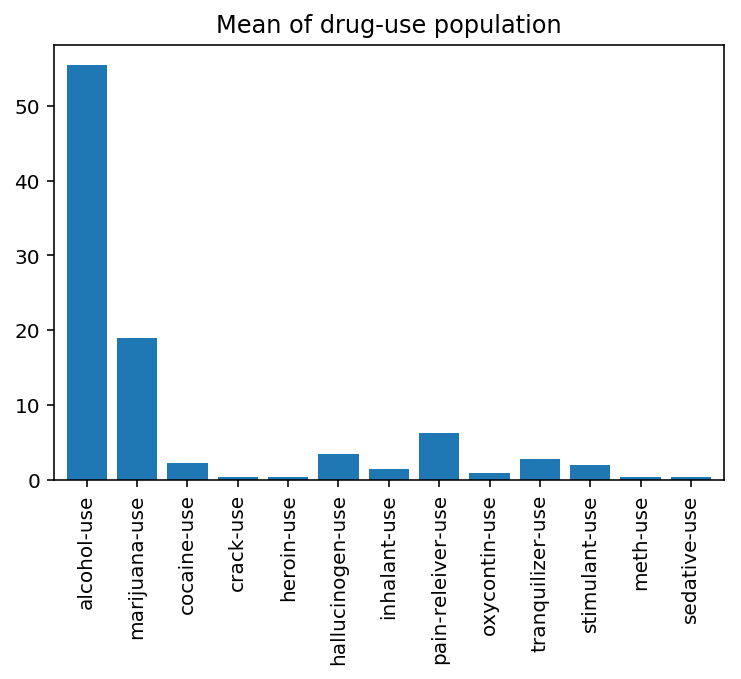

In [674]:
# Create a bar chart for means of drug use

row_loc = list(range(1, len(drug_describe.index), 2))
drug_use_describe = drug_describe.iloc[row_loc,:]

drug_use_describe['mean'].plot(kind='bar', width=0.8, title='Mean of drug-use population')

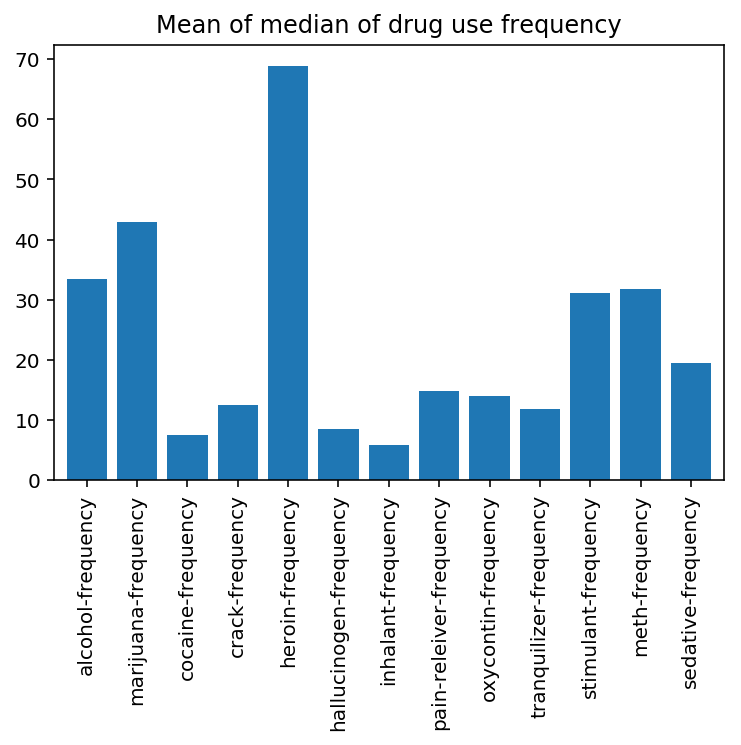

In [675]:
# Create a bar chart for means of median of drug use frequency

row_loc = list(range(2, len(drug_describe.index), 2))
drug_use_describe = drug_describe.iloc[row_loc,:]

drug_use_describe['mean'].plot(kind='bar', width=0.8, title='Mean of median of drug use frequency')

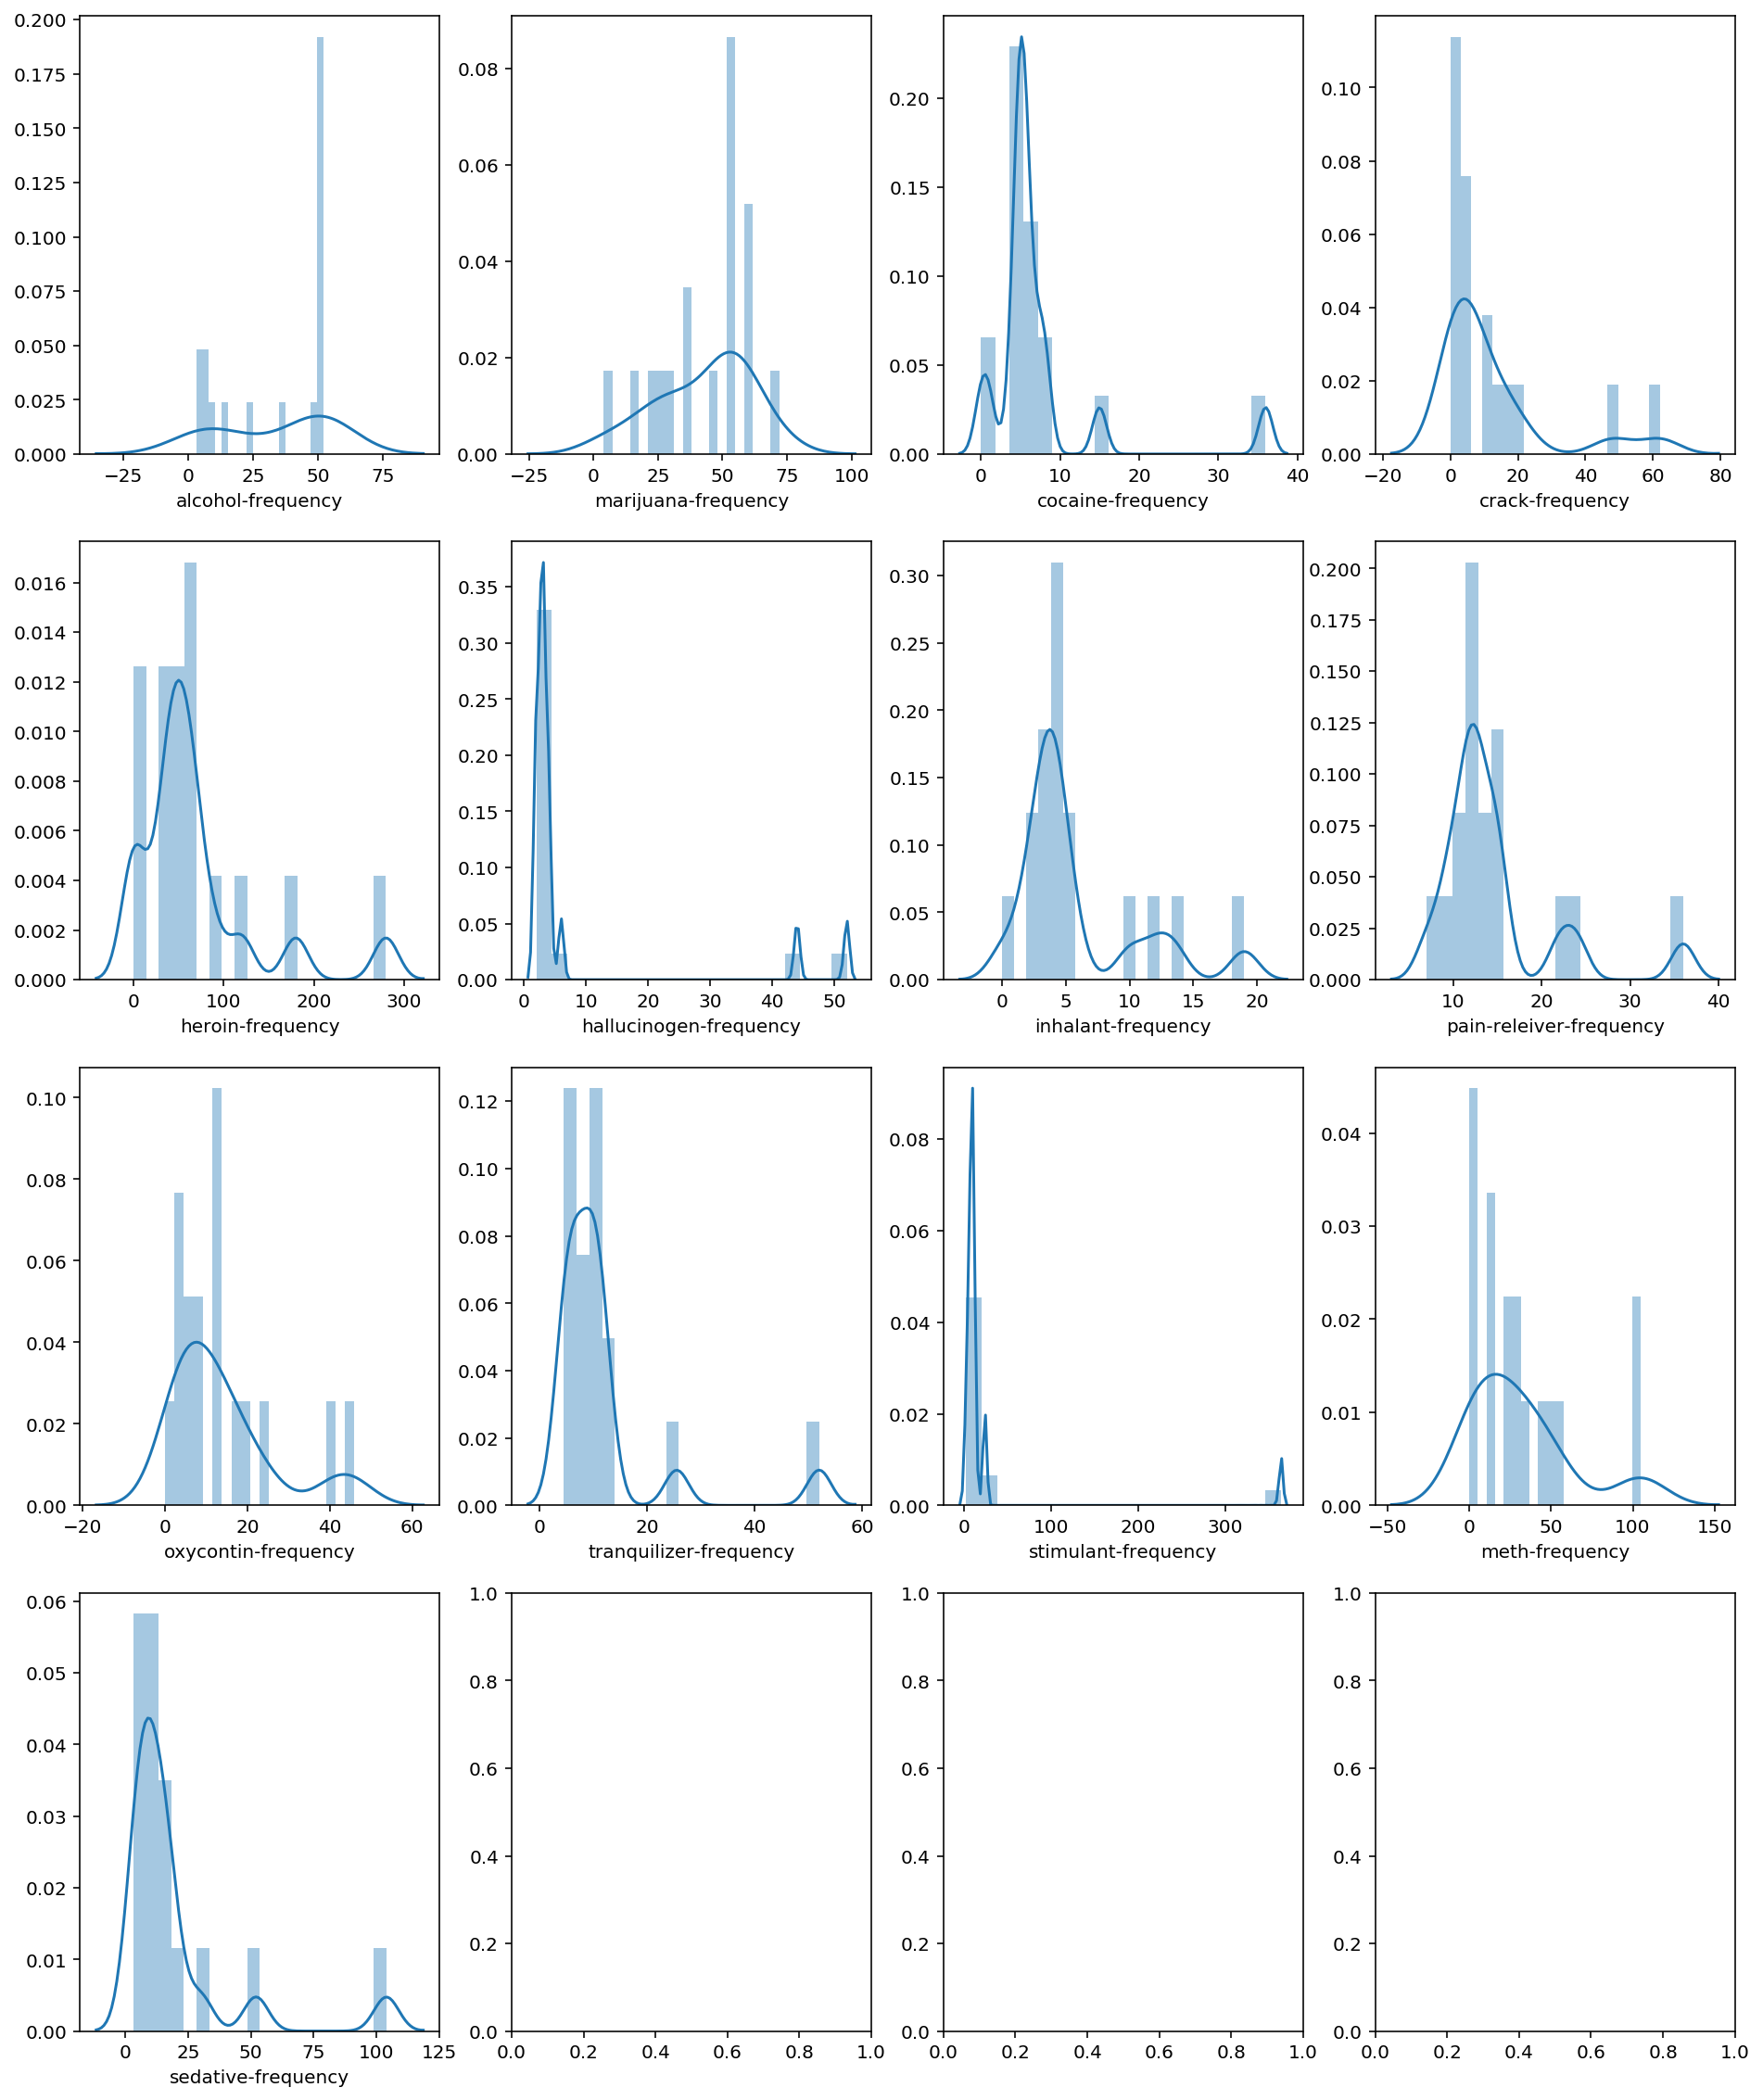

In [414]:
# Visualise frequency of median frequency of each drug type

fig, axes = plt.subplots(4,4, figsize=(16,20))

for i in range(2, len(drug.columns)):
    #print(i)
    #print(drug.columns[i])
    
    
    if i%2 == 1:
        column = str(drug.columns[i])
        
        # determine where the graph to be drawn
        ax1 = int((i-1)/2-1)//4
        ax2 = int(((i-1)/2)-1)%4
        
        #print(ax1, ax2)
        sns.distplot(drug[column], kde=True, bins=20, ax=axes[ax1][ax2])



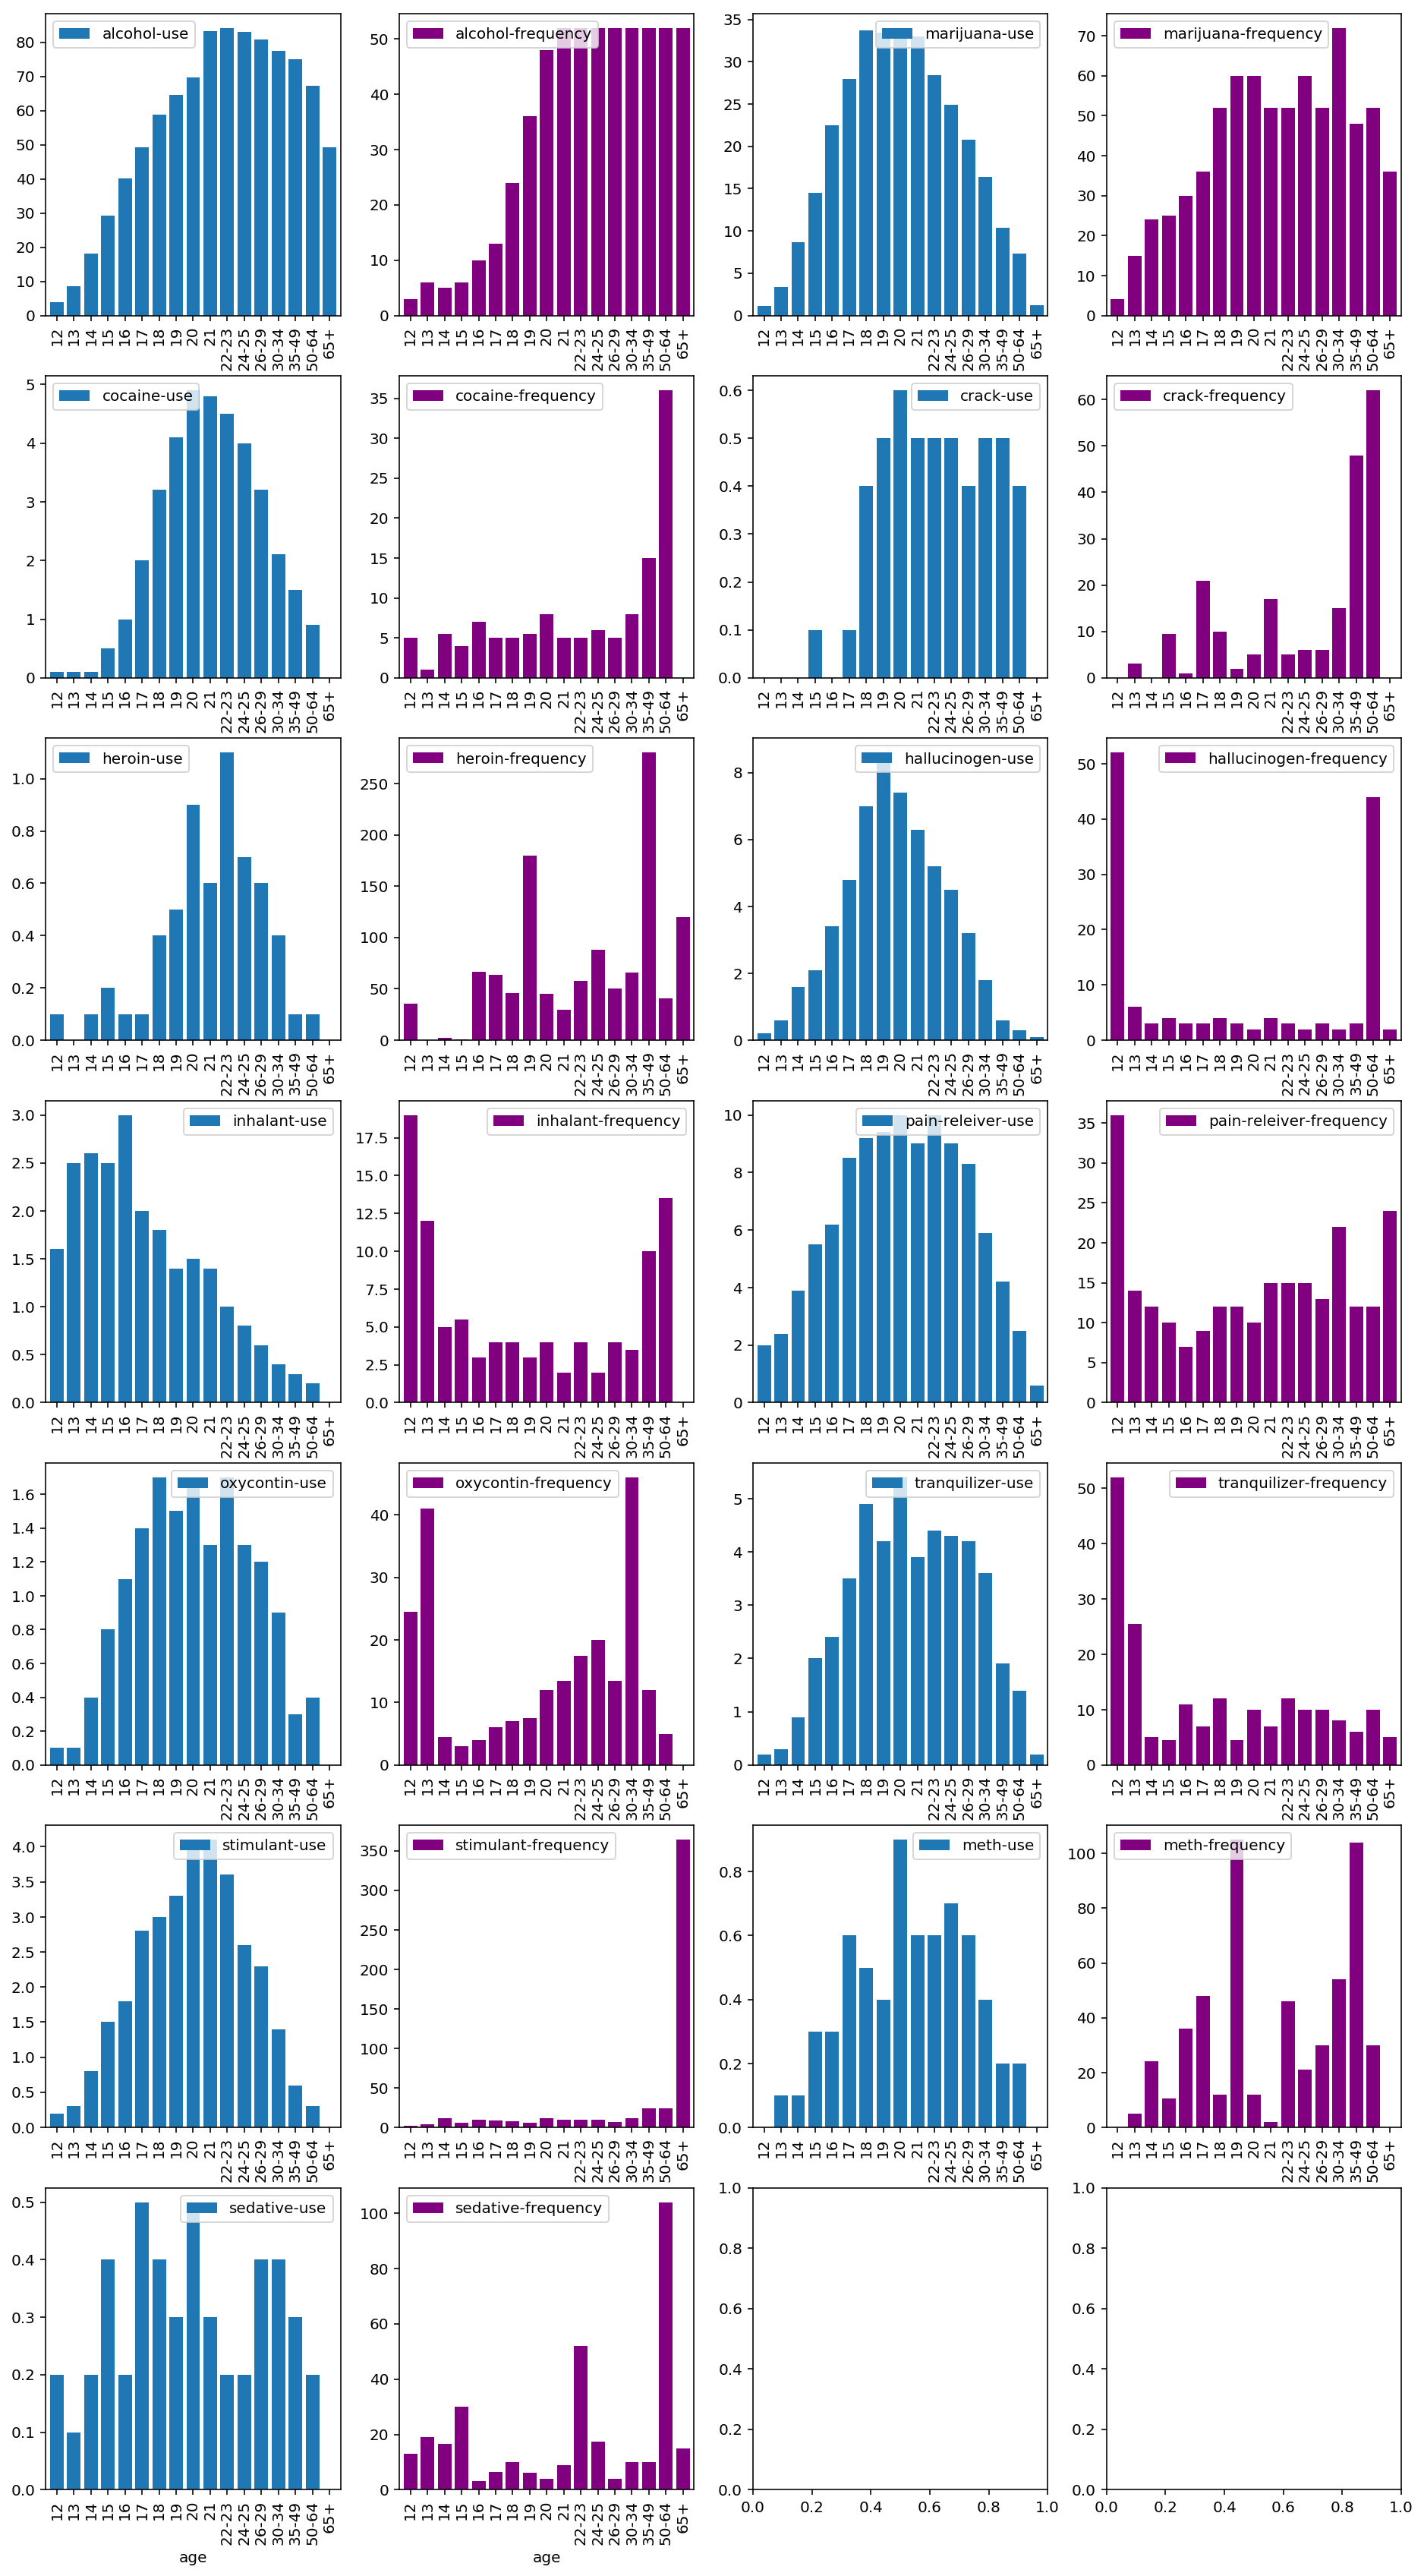

In [380]:
# Visualise age group vs drug-use and median drug frequency

fig, axes = plt.subplots(7,4, figsize=(16,30))

for i in range(2, len(drug.columns)):
    
    # determine where the graph to be drawn
    ax1 = (i-2)//4
    ax2 = (i-2)%4
    
    if ax2%2 == 0:
        drug.plot(x='age', y=drug.columns[i], kind='bar', width=0.8, ax=axes[ax1][ax2])
    else:
        drug.plot(x='age', y=drug.columns[i], kind='bar', width=0.8, ax=axes[ax1][ax2], color='purple')

In [676]:
# Standardise all values to box-plot variables on the same figure

for item in drug.columns:
    #print(item) # gives 'age', 'n', 'alcohol-use', 'alcohol-freq', ...
    
    if drug[item].dtype == 'float64':
        #print(item) # gives 'alcohol-use', 'alcohol-freq', ...
        
            
        mean = drug[item].mean()
        std = drug[item].std()

        
        # print(mean) # gives correct values
        # print(std)  # gives correct values)
        
        drug[item] = drug[item].apply(lambda x: (x-mean)/std)
        #print(drug[item])
    
    else:
        drug[item] = drug[item]

#drug


In [176]:
use = ['alcohol-use', 'marijuana-use', 'cocaine-use', 'crack-use', 'heroin-use', 'hallucinogen-use', 'inhalant-use', 
       'pain-releiver-use', 'oxycontin-use', 'tranquilizer-use', 'stimulant-use', 'meth-use', 'sedative-use']

freq = ['alcohol-frequency','marijuana-frequency', 'cocaine-frequency', 'crack-frequency', 'heroin-frequency',
        'hallucinogen-frequency', 'inhalant-frequency', 'pain-releiver-frequency', 'oxycontin-frequency',
        'tranquilizer-frequency', 'stimulant-frequency', 'meth-frequency', 'sedative-frequency' ]

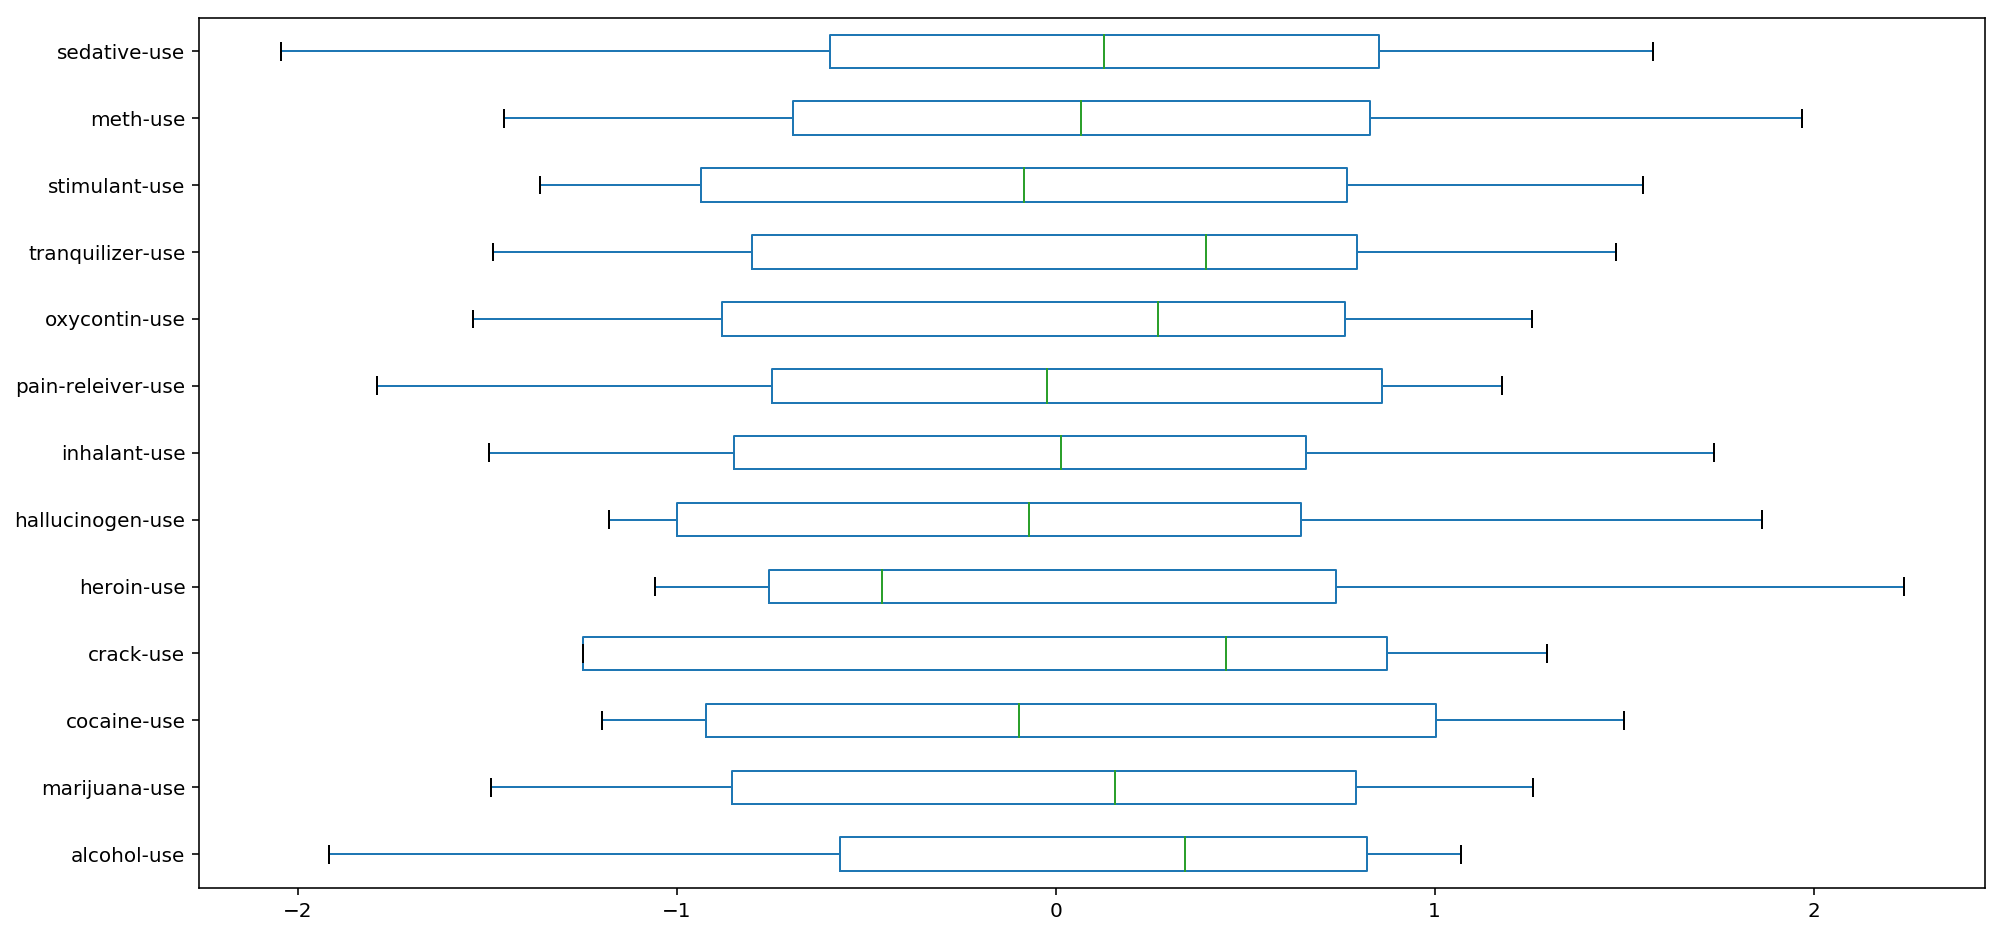

In [196]:
# plot a box diagram for standardised drug USE

drug[use].plot(kind='box', figsize=(16, 8), vert=False)

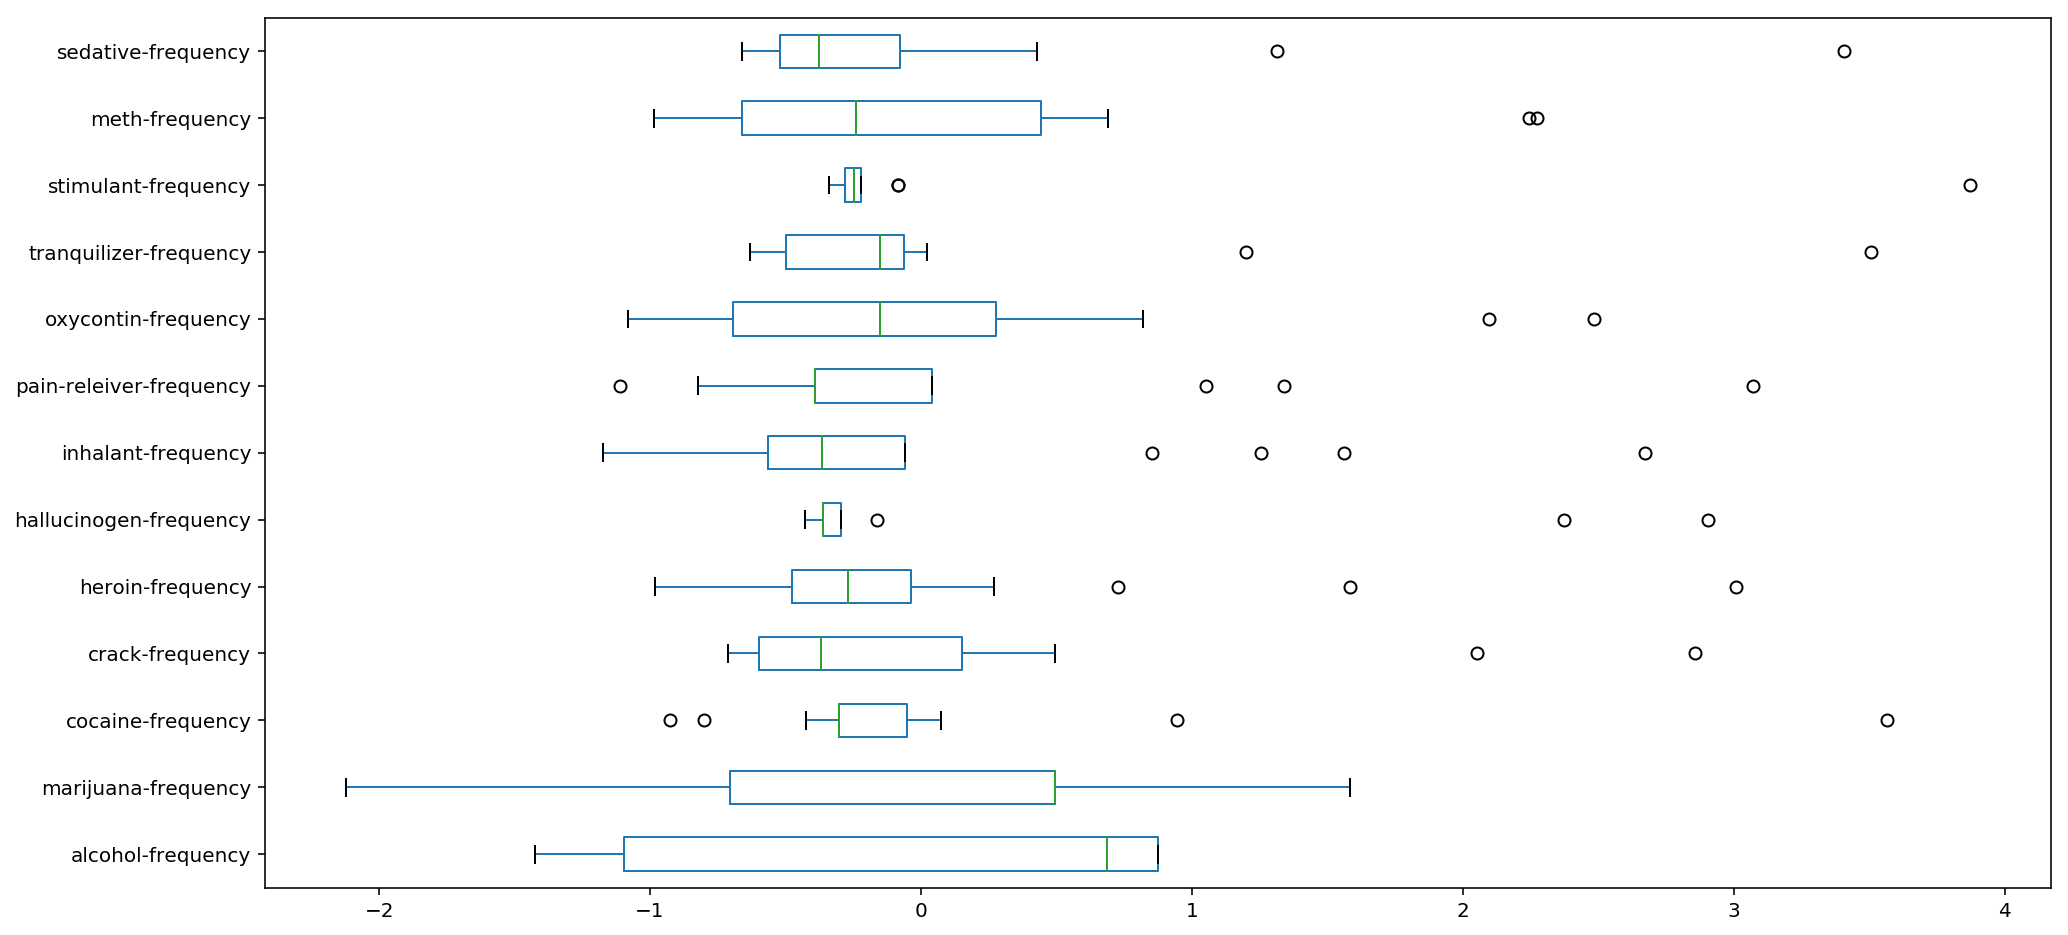

In [185]:
# plot a box diagram for standardised median drug FREQUENCY

drug[freq].plot(kind='box', figsize=(16, 8), vert=False)

In [ ]:
# Loading original data set & replace - to NaN

drug_use = pd.read_csv('C:/Users/norik/Desktop/DSI7 GA Coursework/Projects/Project-2-Submission/drug-use-by-age.csv')
drug = drug_use.replace('-', 0)

def float_data(value):
    return float(value)
    
object_col = ['cocaine-frequency', 'crack-frequency', 'heroin-frequency', 'inhalant-frequency', 'oxycontin-frequency', 'meth-frequency']

for item in object_col:
    # print(item)
    drug[item] = drug[item].apply(float_data)

In [197]:
# Explore correlation between variables

drug_correlation = drug.corr()

In [198]:
import matplotlib.pyplot as plt

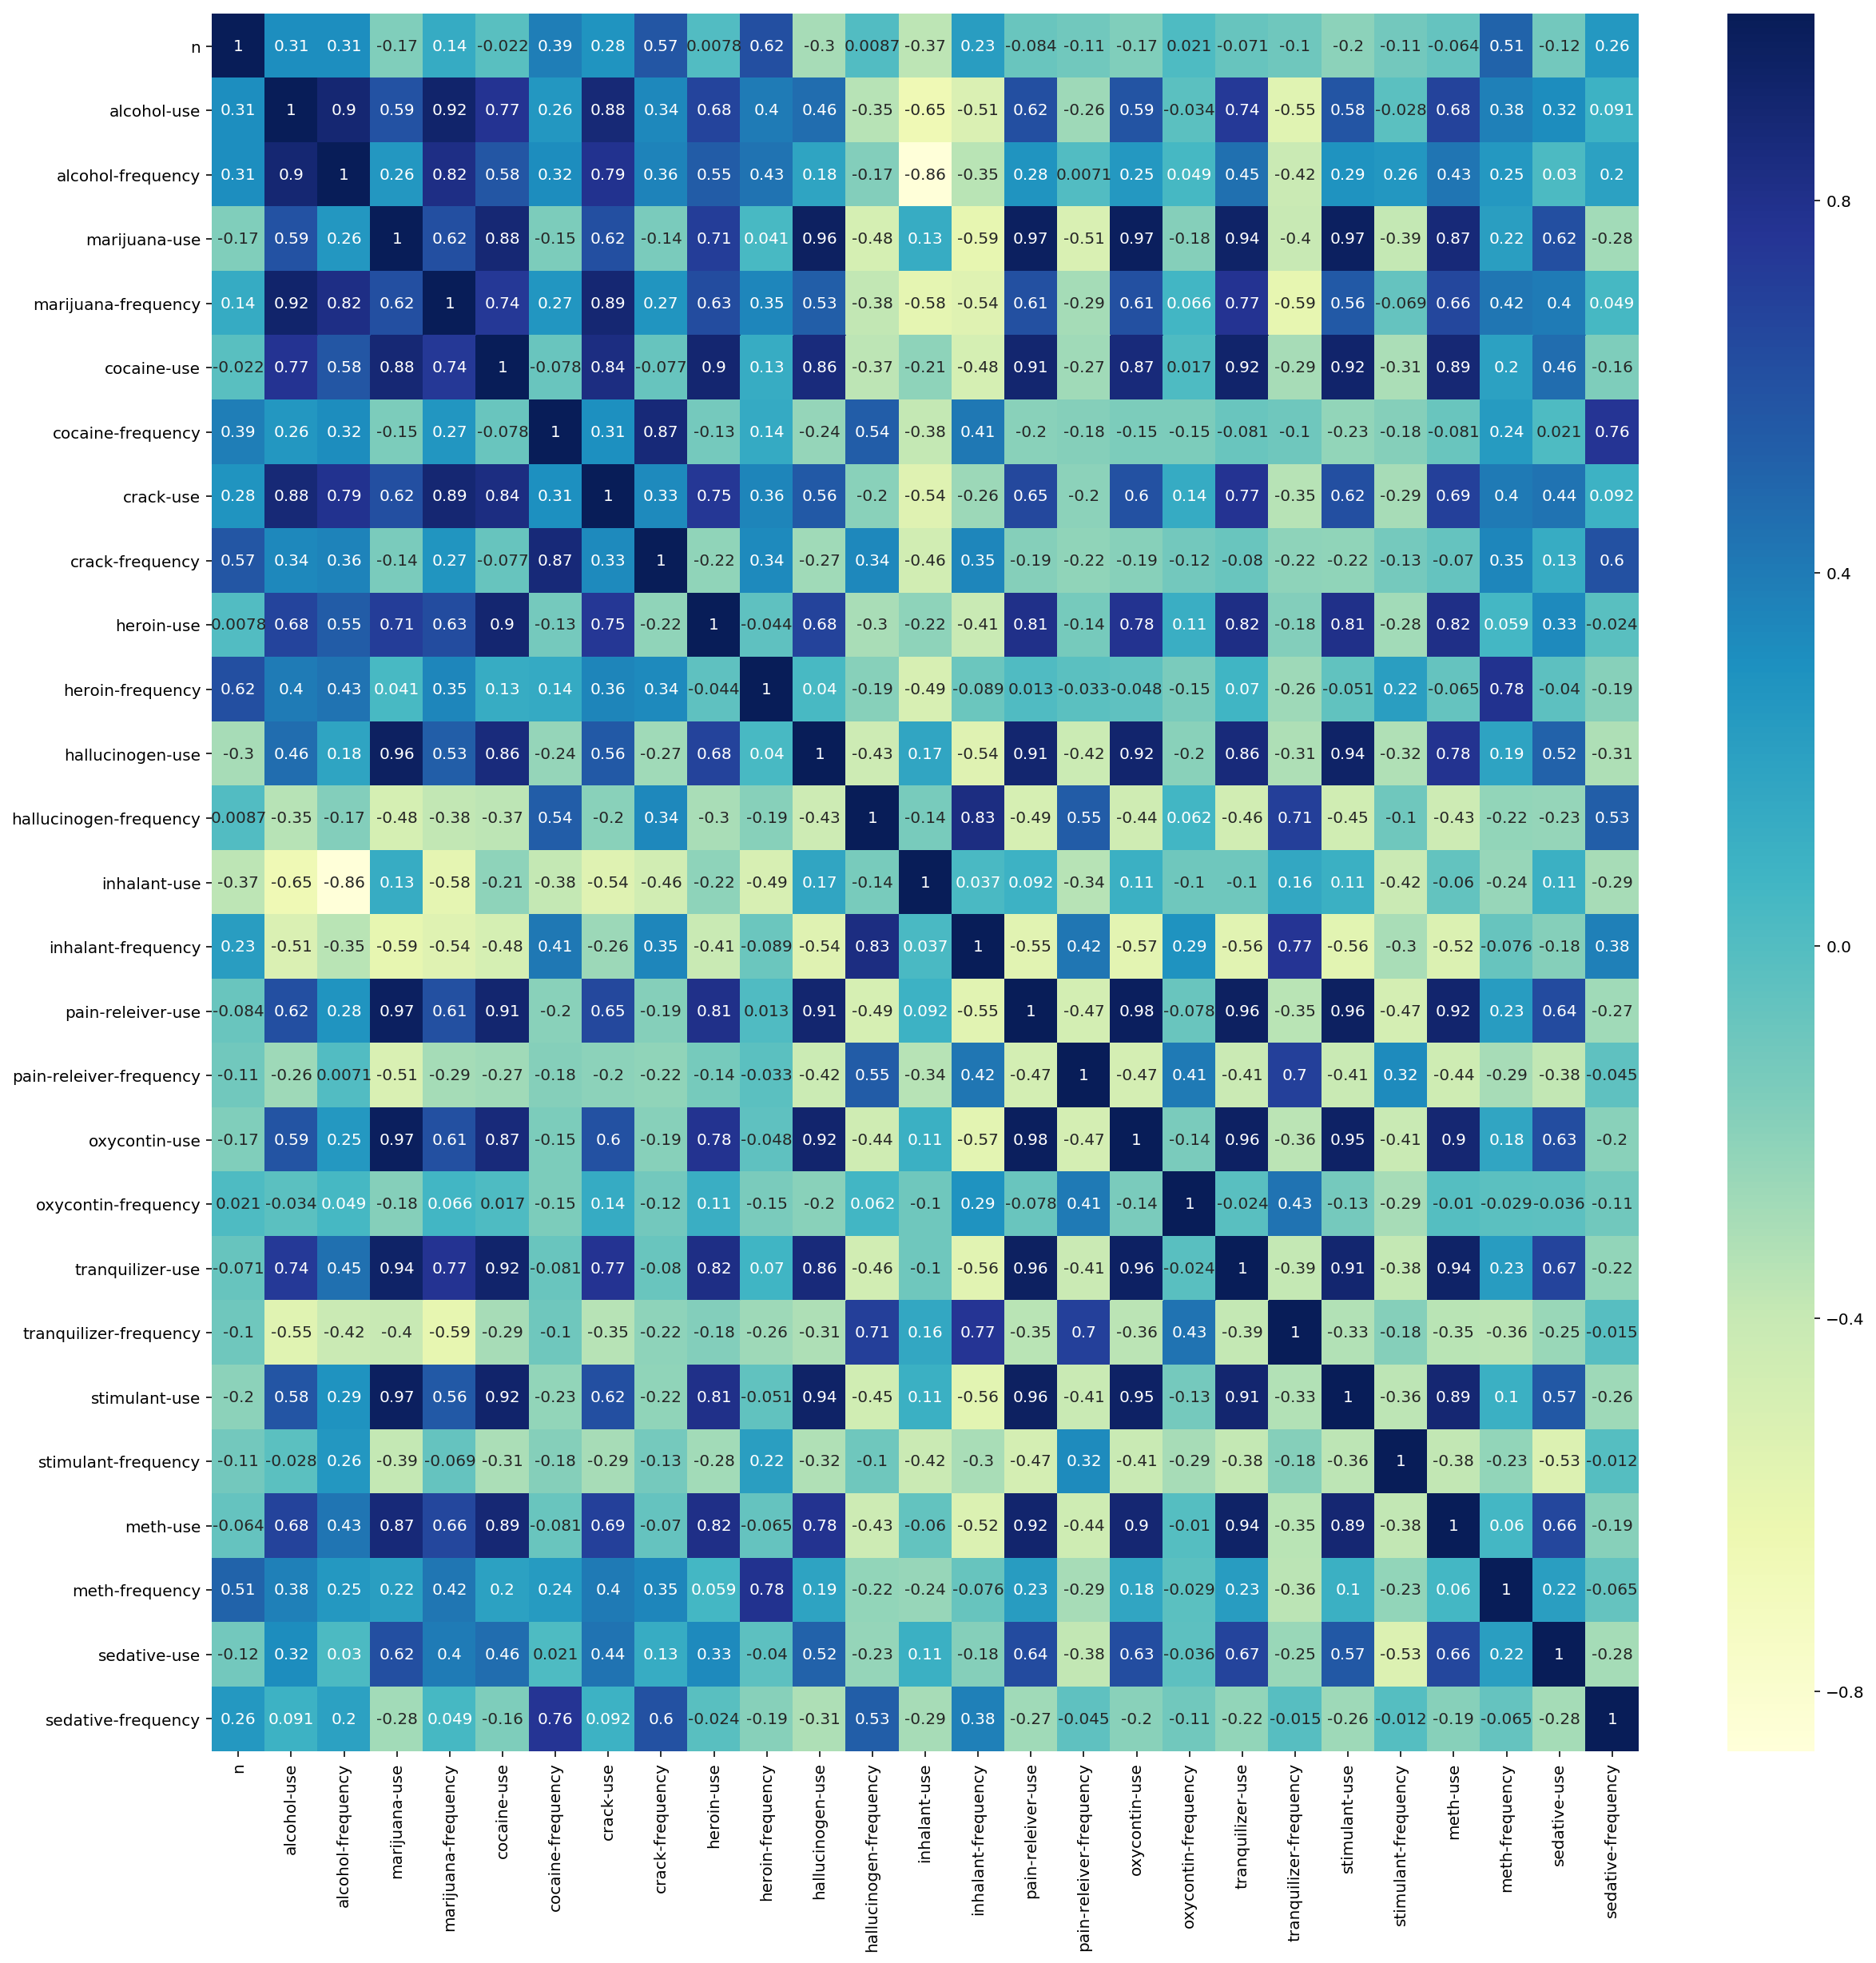

In [199]:
fig, axes = plt.subplots(figsize=(20,20))
sns.heatmap(drug_correlation, annot=True, cmap='YlGnBu', ax=axes)#, fmt='.2g', linewidths=0.3)

In [559]:
# Find all variable pairs which have correlation greater than 0.95

dict = {}  # Initialised empty dictionary


# Iterate through all rows of correlation matrix
for i in range(len(drug_correlation.index)):
    
    values = []  # Initialise empty list
    
    # Iterate through all columns of correlation matrix
    for j in range(len(drug_correlation.columns)):
        
        # We want to access only the upper half of the matrix
        upper = np.triu(drug_correlation)
        corr_value = upper[i][j]
        
        # If the correlation value is greater than 0.95, the column name is appended to the value list.
        if abs(corr_value) != 1 and abs(corr_value) > 0.95:
            #print(corr_value)
            
            values.append(drug_correlation.index[j])
            
            dict[drug_correlation.index[i]] = values

dict

{'marijuana-use': ['hallucinogen-use',
  'pain-releiver-use',
  'oxycontin-use',
  'stimulant-use'],
 'pain-releiver-use': ['oxycontin-use', 'tranquilizer-use', 'stimulant-use'],
 'oxycontin-use': ['tranquilizer-use']}

0.9593526145599981
0.966225865412987
0.9717329769163842
0.9680961763729243
0.9764446814654527
0.9592832360684839
0.9614837481931762
0.9550806511348201


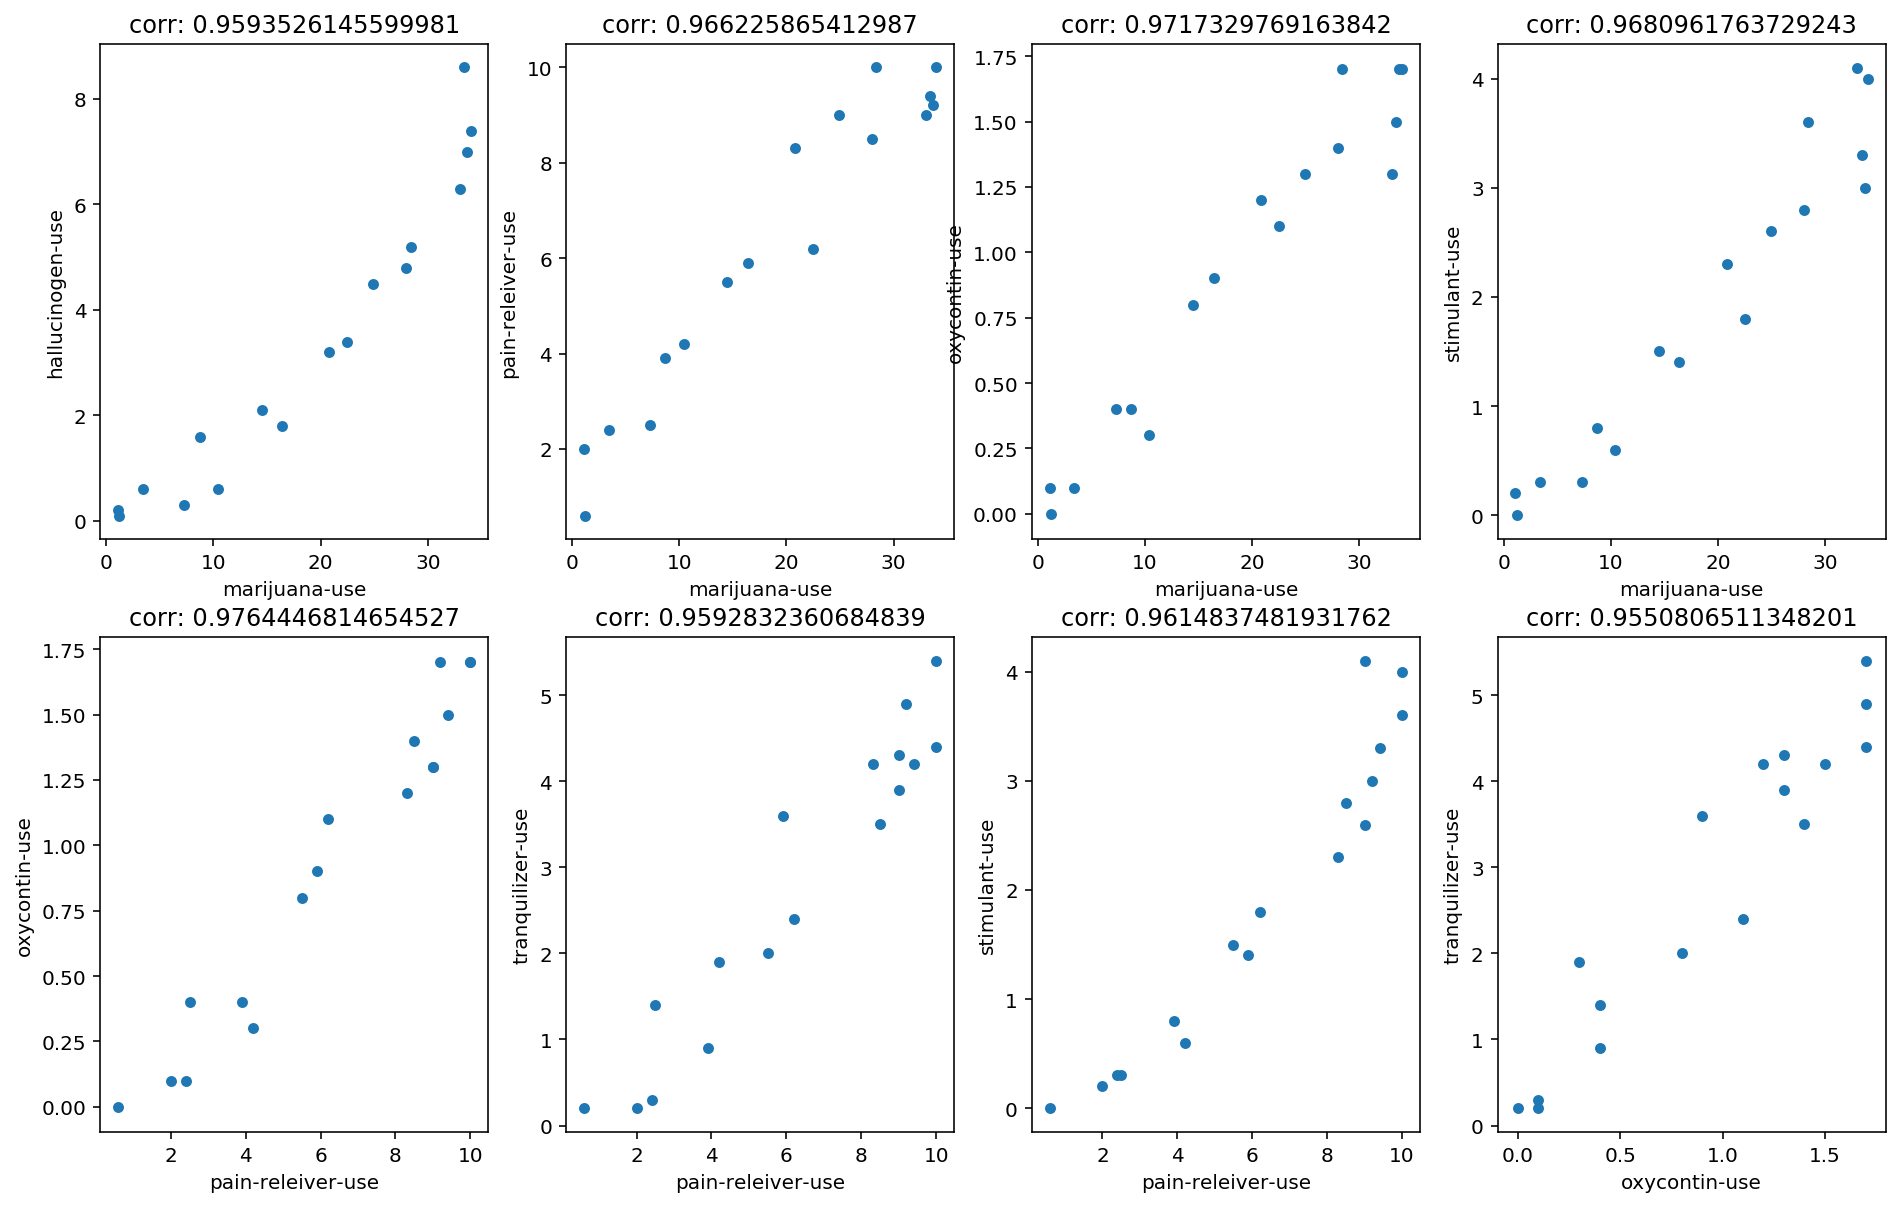

In [567]:
# Scatter plot highly correlated variables that were found above.

# Initialise the plot space
fig, axes = plt.subplots(2,4, figsize=(16,10))

# Create a list of dictionary keys
dict_keylist=list(dict.keys())

# 'count' will be used to locate each plot on the plot space
count = 0

# Iterate throug the dictionary 'keys' list
for i in range(len(dict_keylist)):
    #print(i)
    var1 = dict_keylist[i]
    
    # Iterate through the 'values' list for given 'key'
    for j in range(len(dict[var1])):
        #print(j)
        var2 = dict[var1][j]
        
        count += 1
        ax1 = (count-1)//4
        ax2 = (count-1)%4
         
        drug.plot(x=var1, y=var2, kind='scatter', ax=axes[ax1][ax2], title = 'corr: ' + str(drug[var1].corr(drug[var2])))
        
        # print(count)

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [ ]:
# Loading original data set & replace - to NaN

drug_use = pd.read_csv('C:/Users/norik/Desktop/DSI7 GA Coursework/Projects/Project-2-Submission/drug-use-by-age.csv')
drug = drug_use.replace('-', 0)

def float_data(value):
    return float(value)
    
object_col = ['cocaine-frequency', 'crack-frequency', 'heroin-frequency', 'inhalant-frequency', 'oxycontin-frequency', 'meth-frequency']

for item in object_col:
    # print(item)
    drug[item] = drug[item].apply(float_data)

# Q1. Are there any relationship between the age and each drug use?

Deliverable : We will use chi-square test to determine whether there is a relationship between the age and each drug.

In [597]:
# Null hypothesis H0 : There is no relationship between the age and the drug.
# Alt hypothesis Na : There is a relationship betweem the age and the drug.


dof = len(drug.index) - 1   # degree of freedom = number of rows -1 
q = 0.95                   # 95% confidence interval

critical_value = stats.chi2.ppf(q = 0.95, df = dof)
print("Critical value : " + str(critical_value))


Critical value : 26.29622760486423


In [729]:
print(dof)

16


In [727]:
for i in range(len(drug.columns)):
    
    
    if i >= 2 and i%2 == 0:
        #print(i)

        
        use = drug['n'] * drug[drug.columns[i]] / 100   # calculate number of people using the drug 
        df_use = pd.DataFrame(use)
        #print(df_use)
        #print(float(df_use.sum()))
        
        # Expected value
        expected_ratio = use.sum() / drug['n'].sum()
        #print(expected_ratio)
        expected = drug['n'] * expected_ratio
        df_expected = pd.DataFrame(expected)
        #print(df_expected)
        #print(df_use)
        
        # Chi^2 value for individual cell
        chi2 = (df_use.values - df_expected.values)**2 / df_expected.values
        #print(chi2)
        
        # Sum of Chi^2
        chi2_sum = chi2.sum()
        #print(chi2_sum)
        #value_chi2sum.append(chi2_sum)
        
        # p-value
        p_value = 1 - stats.chi2.cdf(x=chi2_sum,  df= dof)
        #value_p.append(p_value)

        
        print(drug.columns[i])
        print('Chi-square value : ' + str(chi2_sum))
        print('p-value : ' + str("%.10f" % p_value))
        # Decide whether to reject or accept the null hypothesis
        if p_value < alpha:
            print('We reject the null hypothesis and conclude the there is a relationship between the age and ', str(drug.columns[i]))
        elif p_value > alpha:
            print('We fail to reject the null hypothesis and cannot conclude there is a relationship between the age and ', str(drug.columns[i]))
        else:
            print('Our test is inconclusive.')
        
        print('------------------------------------------')
       
        

alcohol-use
Chi-square value : 6173.8111151048315
p-value : 0.0000000000
We reject the null hypothesis and conclude the there is a relationship between the age and  alcohol-use
------------------------------------------
marijuana-use
Chi-square value : 3632.5350686291563
p-value : 0.0000000000
We reject the null hypothesis and conclude the there is a relationship between the age and  marijuana-use
------------------------------------------
cocaine-use
Chi-square value : 727.6106775609412
p-value : 0.0000000000
We reject the null hypothesis and conclude the there is a relationship between the age and  cocaine-use
------------------------------------------
crack-use
Chi-square value : 85.43886169549191
p-value : 0.0000000000
We reject the null hypothesis and conclude the there is a relationship between the age and  crack-use
------------------------------------------
heroin-use
Chi-square value : 181.18720901413062
p-value : 0.0000000000
We reject the null hypothesis and conclude the the

# Q1 Report
The null hypothesis was rejected for all drug types in the data set. We conclude there is a relationship between the age and each type of drug use. It needs to be noted that the greater the number of samples, the higher chi-square value becomes, which means smaller p-value. This increases the chance of Type 2 error. 


In [713]:
# Create a new dataframe for drug use only and with actual number

appended_df = []

for i in range(len(drug.columns)):
    
   
    
    if i >= 2 and i%2 == 0:
        #print(i)

        
        use = drug['n'] * drug[drug.columns[i]] / 100   # calculate number of people using the drug 
        #df_use = pd.DataFrame(use)
        appended_df.append(use)
appended_df = pd.concat(appended_df, axis=1)

appended_df.columns = ['alcohol-use', 'marijuana-use', 'cocaine-use', 'crack-use', 'heroin-use', 'hallucinogen-use', 'inhalant-use', 
       'pain-releiver-use', 'oxycontin-use', 'tranquilizer-use', 'stimulant-use', 'meth-use', 'sedative-use']
appended_df.index = drug['age']
appended_df
        #print(df_use)


# Create a new dataframe by adding all values 

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
age,,,,,,,,,,,,,
12,109.122,30.778,2.798,0.000,2.798,5.596,44.768,55.960,2.798,5.596,5.596,0.000,5.596
13,234.345,93.738,2.757,0.000,0.000,16.542,68.925,66.168,2.757,8.271,8.271,2.757,2.757
14,505.352,242.904,2.792,0.000,2.792,44.672,72.592,108.888,11.168,25.128,22.336,2.792,5.584
15,863.152,428.620,14.780,2.956,5.912,62.076,73.900,162.580,23.648,59.120,44.340,8.868,11.824
16,1226.258,688.050,30.580,0.000,3.058,103.972,91.740,189.596,33.638,73.392,55.044,9.174,6.116
17,1497.734,850.640,60.760,3.038,3.038,145.824,60.760,258.230,42.532,106.330,85.064,18.228,15.190
18,1449.303,832.053,79.008,9.876,9.876,172.830,44.442,227.148,41.973,120.981,74.070,12.345,9.876
19,1436.058,742.482,91.143,11.115,11.115,191.178,31.122,208.962,33.345,93.366,73.359,8.892,6.669
20,1582.887,772.140,111.279,13.626,20.439,168.054,34.065,227.100,38.607,122.634,90.840,20.439,11.355


In [ ]:
# Now create first 4 rows

# Q2. Is Alcohol more frequently used than Marijuana?


Deliverable : We perform the t-test to compare the means of median alcohol-frequency and that of marijuana.

In [623]:
# Obtain 'alcohol-frequency' and 'marijuana-frequency' data

drug_summary = drug.describe().T
alco_mari_freq = drug_summary.iloc[[2,4]]
alco_mari_freq

,count,mean,std,min,25%,50%,75%,max
alcohol-frequency,17.0,33.352941,21.318833,3.0,10.0,48.0,52.0,52.0
marijuana-frequency,17.0,42.941176,18.362566,4.0,30.0,52.0,52.0,72.0


Text(0.5, 0, 'Median frequency [Alcohol - Marijuana]')

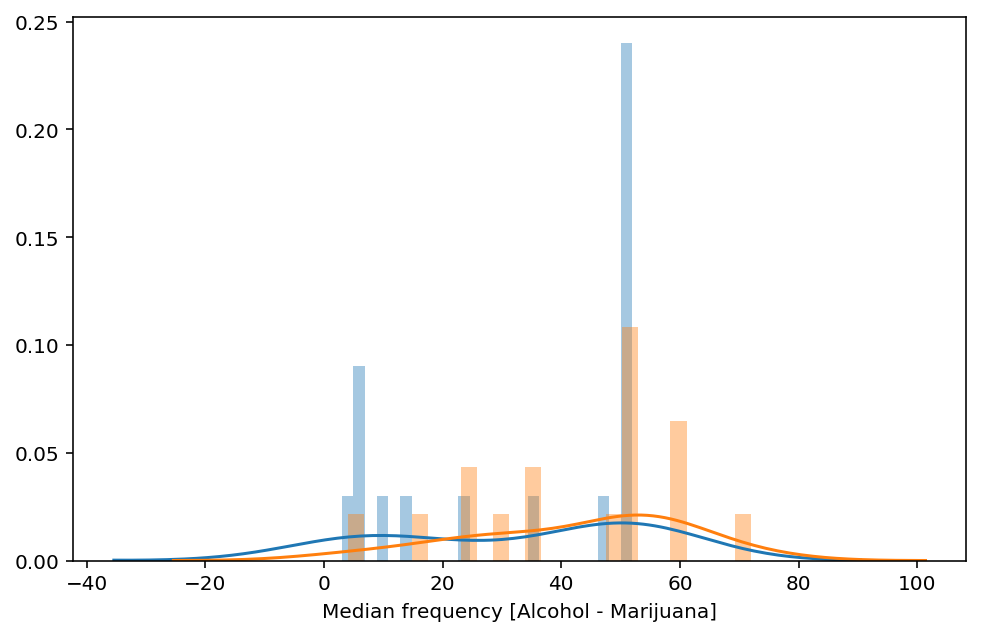

In [728]:
# Visualise frequencies of alcohol-frequency and marijuana-frequency

fig=plt.figure(figsize=(8,5))
ax=fig.gca()
sns.distplot(drug['alcohol-frequency'], bins=25, kde=True)
sns.distplot(drug['marijuana-frequency'], bins=25, kde=True)
ax.set_xlabel('Median frequency [Alcohol - Marijuana]')

In [649]:
# Null hypothesis, H0 : The mean of median frequency of alcohol use is the same as that of marijuana use.
# Alt hypothesis, Ha : Frequency of alcohol use is larger or less than marijuana use.

# Confidence interval = 0.95
alpha = 0.05


from scipy.stats import t

# Find 95% confidence interval for median alcohol-frequency
int95_alcohol_freq = t.interval(0.95,
                               len(drug['alcohol-frequency'])-1,
                               loc=drug['alcohol-frequency'].mean(),
                               scale=drug['alcohol-frequency'].sem())

print('95% confidence interval for median Alcohol frequency : ', int95_alcohol_freq)


# Find 95% confidence interval for median marijuana-frequency
int95_marijuana_freq = t.interval(0.95,
                               len(drug['marijuana-frequency'])-1,
                               loc=drug['marijuana-frequency'].mean(),
                               scale=drug['marijuana-frequency'].sem())

print('95% confidence interval for median Marijuana frequency : ', int95_marijuana_freq)

95% confidence interval for median Alcohol frequency :  (22.391808602978337, 44.31407374996284)
95% confidence interval for median Marijuana frequency :  (33.500016304982495, 52.38233663619397)


In [648]:
# Calculate t-value and p-value

import scipy.stats as stats

t_value = stats.ttest_ind(drug['alcohol-frequency'], drug['marijuana-frequency'])[0]
p_value = stats.ttest_ind(drug['alcohol-frequency'], drug['marijuana-frequency'])[1]

print('t-value : ', t_value)
print('p-value : ', p_value/2)

# Decide whether to reject or accept the null hypothesis
if p_value < alpha:
    print('We reject the null hypothesis and conclude the median alcohol frequency is different from the median marijuana frequency.')
elif p_value > alpha:
    print('We fail to reject the null hypothesis and cannot conclude the median alcohol frequency is different from the median marijuana frequency.')
else:
    print('Our test is inconclusive.')

t-value :  -1.4050418979783086
p-value :  0.084821392030932
We fail to reject the null hypothesis and cannot conclude the median alcohol frequency is different from the median marijuana frequency.


# Q2 Report
The plot of median alcohol frequency and marijuan frequency frequency and the 95% confidence interval calculations show these two variables have a large overlap.
The p-value indicates there is a 8.48% chance that the null hypothesis is true. This is higher than out 5% significance level, hence we fail to reject the null hypothesis that the alcohol frequency differs from marijuana frequency.

# Q3. Can we predict the % of population who use Oxycontin from % of population who use pain-reliever?
From the EDA, we saw a high correlation of 0.976 between Axycontin and Pain-Reliever use.


Deliverable : Is there sufficient evidence that the correlation exists?

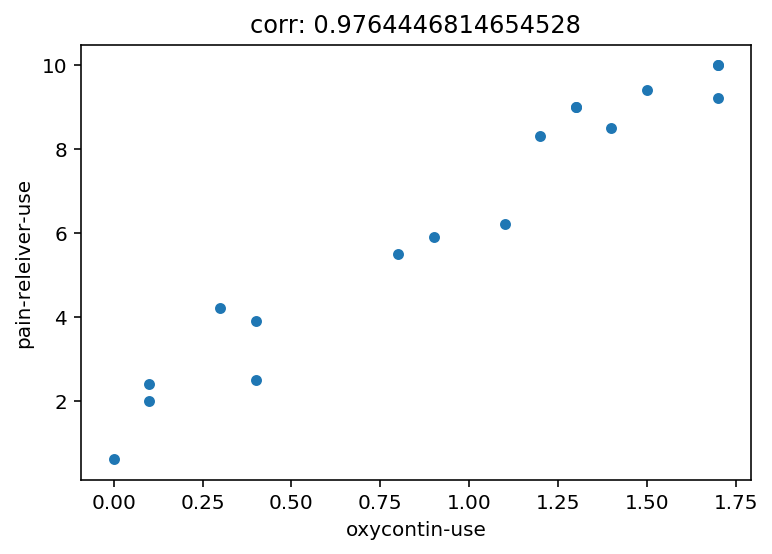

In [732]:
# Visualise Oxycontin vs Pain-reliever use

drug.plot(x='oxycontin-use', y='pain-releiver-use', kind='scatter', title = 'corr: ' + str(drug['oxycontin-use'].corr(drug['pain-releiver-use'])))

In [697]:
# Perform t-test for existance of linear relationship

# Null Hypothesis, H0 : There is no significant linear relationship between oxycontin-use and pain-releiver-use
# Alt Hypothesis, Ha : There is a significant linear relationship between oxycontin-use and pain-releiver-use


# Confidence interval = 0.95
alpha = 0.05 

# Calculate t-value and p-value

import scipy.stats as stats

t_value = stats.pearsonr(drug['oxycontin-use'], drug['pain-releiver-use'])[0]
p_value = stats.pearsonr(drug['oxycontin-use'], drug['pain-releiver-use'])[1]

print('t-value : ', t_value)
print('p-value : ', p_value)

# Decide whether to reject or accept the null hypothesis
if p_value < alpha:
    print('We reject the null hypothesis. There is sufficient evidence at 0.05 significance level to conclude that there is a linear relationship between oxycontin use and pain-releiver use.')
elif p_value > alpha:
    print('We fail to reject the null hypothesis. There is not enough evidence at 0.05 significance level to conclude that there is a linear relationship between oxycontin use and pain-releiver use.')
else:
    print('Our test is inconclusive.')

t-value :  0.9764446814654525
p-value :  2.116296595839512e-11
We reject the null hypothesis. There is sufficient evidence at 0.05 significance level to conclude that there is a linear relationship between oxycontin use and pain-releiver use.


# Q3 Report

The existance of linear relationship between the oxycontin use and pain-reliever use. The Pearson's correlation coefficient returned 0.98 which indicates there is a significant linear relationship between two variables. The p-value shows significantly smaller than alpha: only 0.00000000212% chance that the null hypothesis is true. Hence we conclude to reject the null hypothesis.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [716]:
# Outlier
df.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [726]:
# If the data point falls more than 1.5 times the interquartile range above the third quartile or below the first quartile,
# it is an outlier.

rate = df['Rate']
quart1 = rate.quantile(0.25)
quart3 = rate.quantile(0.75)

quart_range = quart3-quart1

lower_outlier = quart1 - 1.5*quart_range
upper_outlier = quart3 + 1.5*quart_range

rate_outlier = df[['Rate']][(df['Rate']<lower_outlier) | (df['Rate']>upper_outlier)]
rate_outlier

# There is no outlier in the Rate data

,Rate


In [ ]:
def outlier(data):
    dict = {}
    
    for column in data:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        l_outlier = q1 - 1.5*iqr
        u_outlier = q3 + 1.5*iqr
        
        outlier = data[[column]][(data[column] < l_outlier) | (data[column] > u_outlier)]
        

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.